In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def ERK4(f, T, n, start):

    h = T / n
    x0, y0, z0 = start[0], start[1], start[2]
    t_values = np.linspace(0, 0 + n*h, n+1)
    u_values = np.zeros(shape=(n+1, 3))
    u_values[0] = [x0, y0, z0]

    for i in range(n):
        t = t_values[i]
        x, y, z = u_values[i]

        k1 = h * f(t, x, y, z)
        k2 = h * f(t + h / 2, x + k1[0] / 2, y + k1[1] / 2, z + k1[2] / 2)
        k3 = h * f(t + h / 2, x + k2[0] / 2, y + k2[1] / 2, z + k2[2] / 2)
        k4 = h * f(t + h, x + k3[0], y + k3[1], z + k3[2])

        u_values[i+1] = u_values[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return t_values, u_values

    # t \in [0, T]
    # u_values[:, 0] -> S(t), u_values[:, 1] -> I(t), u_values[:, 2] -> R(t)

In [1]:
def draw(f, T, h, data):
    t, u = ERK4(f, T, h, data)
    plt.figure(figsize=(10,5))
    x, y, z = u.T[0], u.T[1], u.T[2]
    plt.plot(t, x, label='Susceptible', c='b')
    plt.plot(t, y, label='Infected', c='y')
    plt.plot(t, z, label='Recovererd', c='r')
    plt.title('járvány szimuláció')
    plt.legend()
    plt.show()

In [4]:
beta = 0.25                   # infection rate
gamma = 0.1                   # recovery rate
start = [0.99, 0.01, 0.00]

def SIR(t, S, I, R):
    dS = - beta * S * I
    dI = + beta * S * I - gamma * I
    dR = + gamma * I
    return np.array([dS, dI, dR])

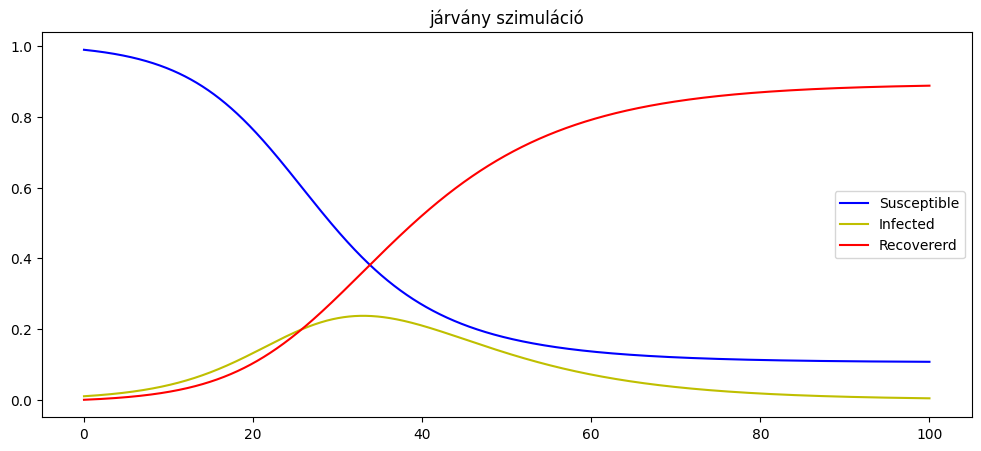

In [5]:
draw(SIR, 100, 10000, start)

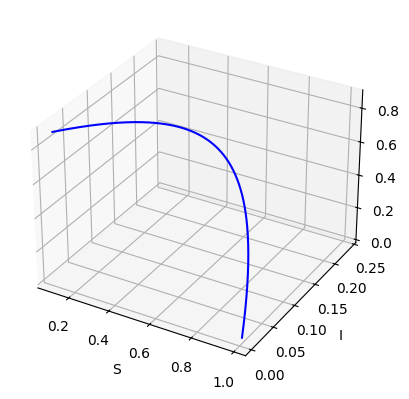

In [11]:
t_values, u_values = ERK4(SIR, 100, 1000, start)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(u_values[:, 0], u_values[:, 1], u_values[:, 2], 'b-')

ax.set_xlabel('S')
ax.set_ylabel('I')
ax.set_zlabel('R')


plt.show()

In [ ]:
def sis(t, S, I):